In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import random
import string
import tensorflow as tf

   Feature1  Feature2  Target
0  2.067788  0.258133       1
1  0.993994 -0.609145       1
2 -0.690315  0.749921       0
3  1.023582  0.529003       0
4  0.700747 -0.496724       1

[5 rows x 3 columns]
(500, 2) (500,)


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


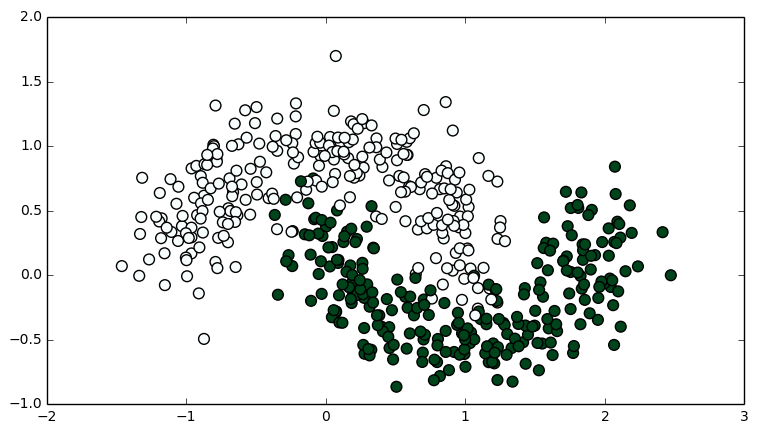

In [24]:
random.seed(123)
get_ipython().magic('matplotlib inline')
matplotlib.rcParams['figure.figsize'] = (9.0, 5.0)
train = pd.read_csv("DL/notebooks/intro_to_ann.csv")
print (train.head())
X, Y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])
print(X.shape, Y.shape)
plt.scatter(X[:,0], X[:,1], s=60, c=Y, cmap=plt.cm.BuGn)
onehotVec = (np.arange(2) == Y[:, None]).astype(np.float32)

In [17]:
x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 2])
W1 = tf.Variable(tf.random_normal([2, 4]))
b1 = tf.Variable(tf.zeros([4]))
W2 = tf.Variable(tf.random_normal([4, 2]))
b2 = tf.Variable(tf.zeros([2]))
L1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1), b1))
L2 = tf.nn.softmax(tf.add(tf.matmul(L1,W2), b2))

In [25]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(L2)))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.initialize_all_variables()
errors = []
with tf.Session() as sess:
    sess.run(init)
    correct_prediction = tf.equal(tf.argmax(L2,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(' Session.')
    for step in range(2000):
        sess.run(train_step, feed_dict={x: X, y: onehotVec})
        accuracy_value = sess.run(accuracy, feed_dict={x: X, y: onehotVec})
        errors.append(1 - accuracy_value)
    print('Weight & Bias :')
    print(sess.run(W2), " ", sess.run(b2))
    print("Error: ", errors[-1])


 Session.
Weight & Bias :
[[ 7.6239152  -6.68656254]
 [ 7.42998505 -6.22459364]
 [-7.46482849  6.84114647]
 [-2.14838958  1.60461426]]   [-3.06864452  3.06866074]
Error:  0.033999979496


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


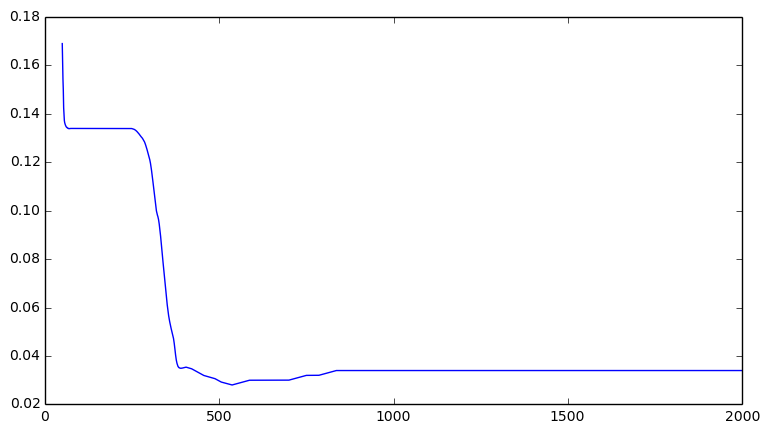

In [26]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()